# **Hierarchical Clustering – Customer Segmentation**

In [1]:
from google.colab import files
uploaded = files.upload('Mall_Customers.csv')

Saving Mall_Customers.csv to Mall_Customers.csv/Mall_Customers.csv


Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import plotly as py
import plotly.graph_objs as go


import warnings
warnings.filterwarnings('ignore')


from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans


Loading the Dataset

In [4]:
df = pd.read_csv('Mall_Customers.csv/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## **Exploratory Data Analysis (EDA)**

Checking Missing Values

In [5]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Statistical Summary

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Distribution of Features

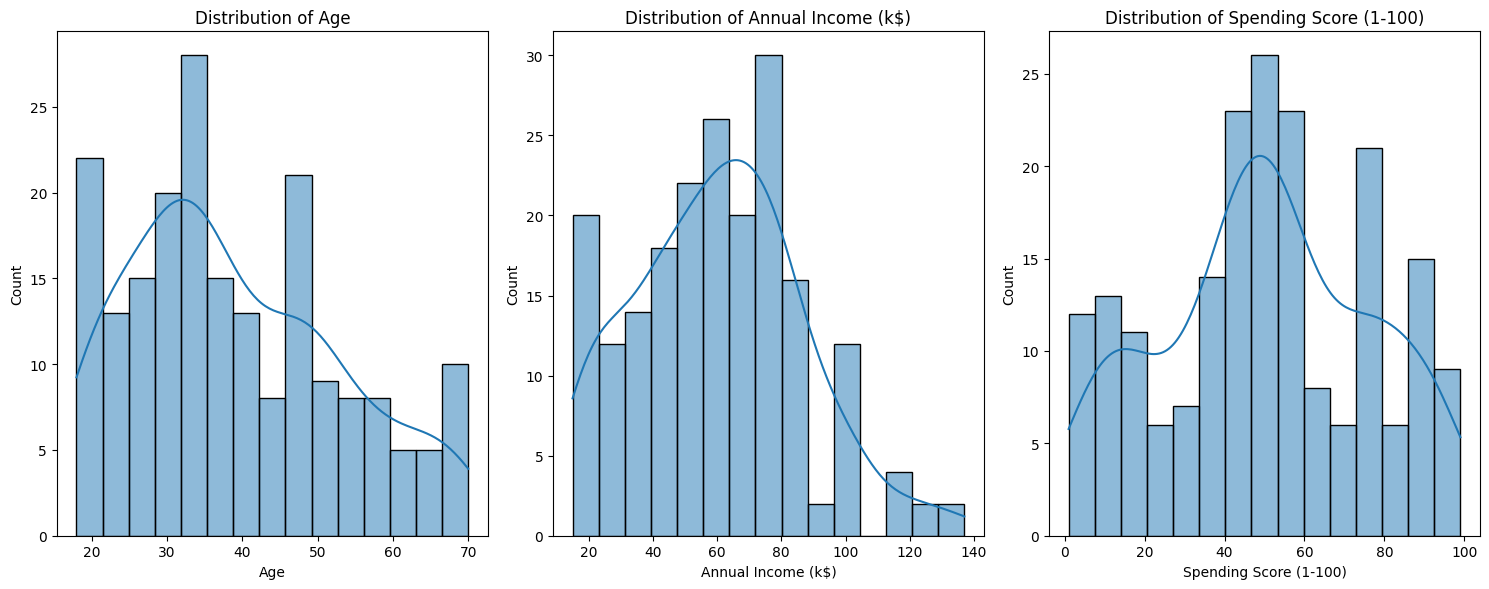

In [8]:
plt.figure(1, figsize=(15,6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n)
    sns.histplot(df[x], bins=15, kde=True)
    plt.title(f'Distribution of {x}')
    plt.tight_layout()
plt.show()

Correlation Heatmap

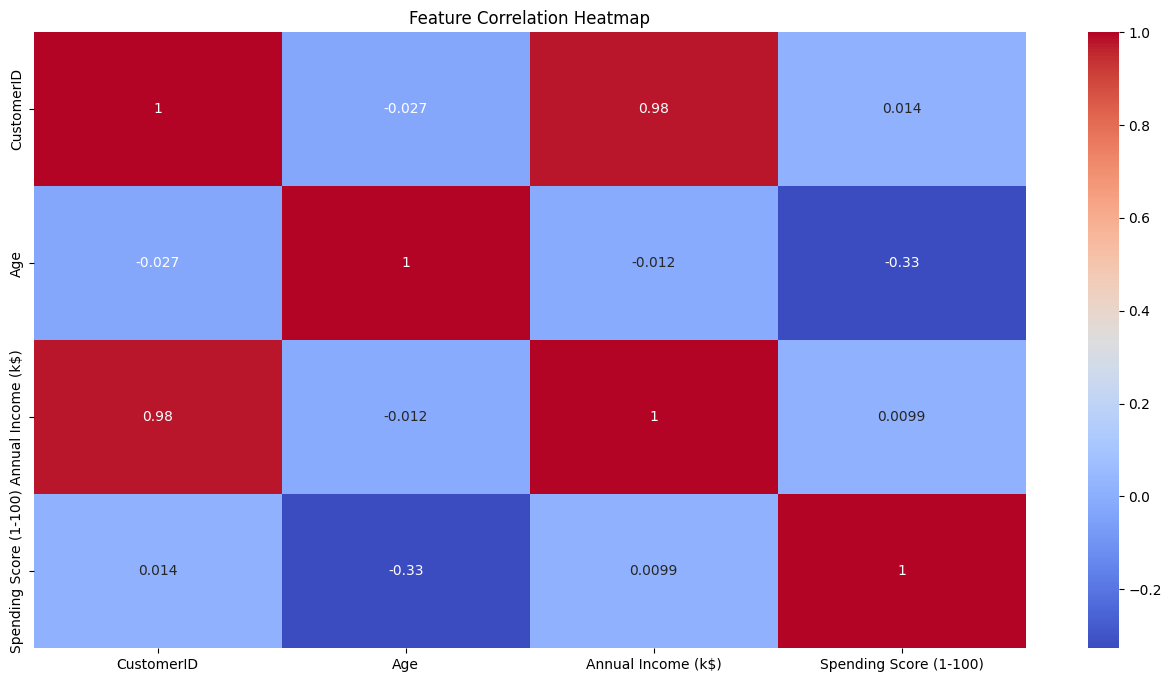

In [9]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## **Data Preprocessing**

Encoding Categorical Variable

In [10]:
label_encoder = preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

Feature Scaling

In [11]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

## **Dendrogram Analysis**

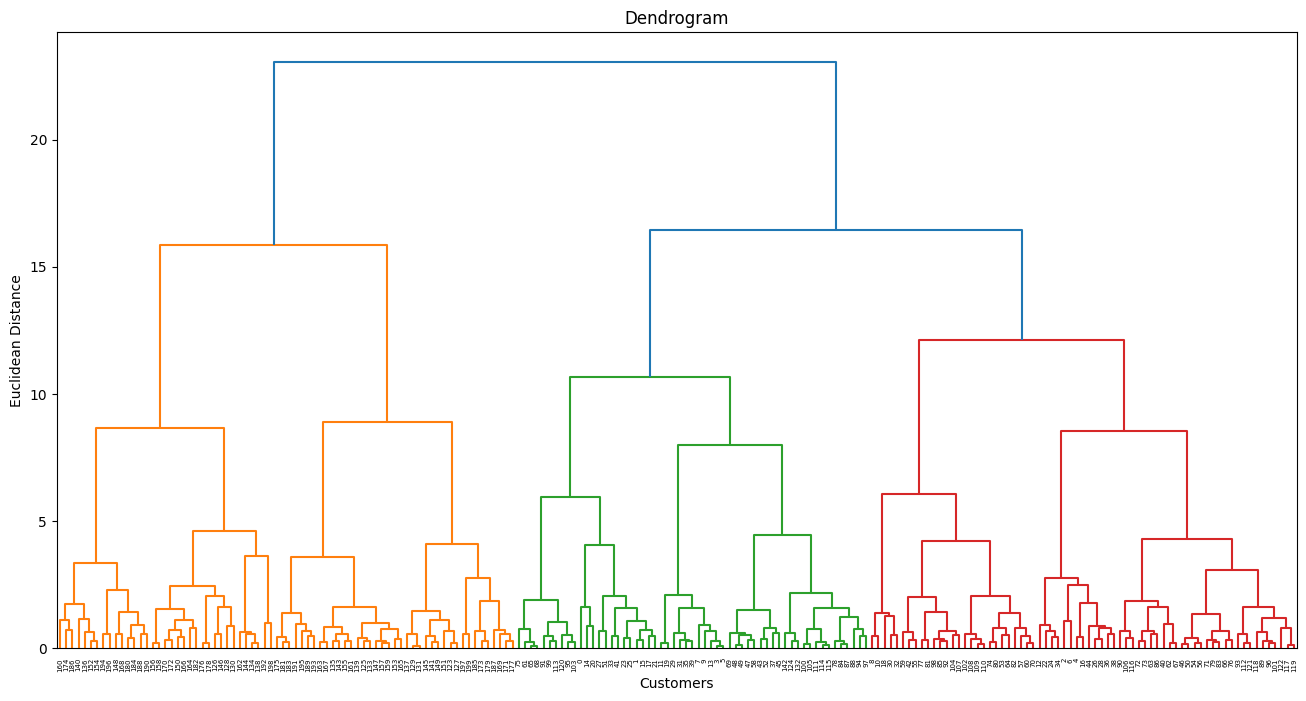

In [12]:
plt.figure(figsize=(16,8))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

## **Hierarchical Clustering Model**

In [13]:
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='average')
y_hc = hc.fit_predict(df_scaled)


df['cluster'] = y_hc

## **Cluster Visualization**

3D Cluster Visualization

In [14]:
trace = go.Scatter3d(
x=df['Age'],
y=df['Spending Score (1-100)'],
z=df['Annual Income (k$)'],
mode='markers',
marker=dict(color=df['cluster'], size=8, opacity=0.8)
)


layout = go.Layout(
title='Customer Segmentation using Hierarchical Clustering',
scene=dict(
xaxis=dict(title='Age'),
yaxis=dict(title='Spending Score'),
zaxis=dict(title='Annual Income')
)
)


fig = go.Figure(data=[trace], layout=layout)
py.offline.iplot(fig)

2D Cluster Visualization

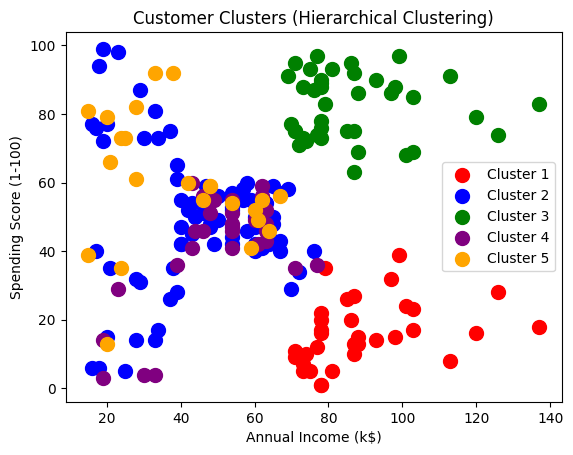

In [16]:
X = df.iloc[:, [3,4]].values


colors = ['red','blue','green','purple','orange']
for i in range(5):
    plt.scatter(X[y_hc==i,0], X[y_hc==i,1], s=100, c=colors[i], label=f'Cluster {i+1}')


plt.title('Customer Clusters (Hierarchical Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## **Model Evaluation**

Silhouette Score

In [17]:
sil_score_hc = silhouette_score(df_scaled, y_hc)
print('Silhouette Score (Hierarchical):', sil_score_hc)

Silhouette Score (Hierarchical): 0.30840675814071083


## **Comparison with K-Means Clustering**

In [18]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_km = kmeans.fit_predict(df_scaled)


df['kmeans_cluster'] = y_km


print('Silhouette Score (K-Means):', silhouette_score(df_scaled, y_km))

Silhouette Score (K-Means): 0.28733914723855114


## **Cluster Profiling & Business Insights**

In [19]:
cluster_profile = df.groupby('cluster').mean()
cluster_profile

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans_cluster
cluster,,,,,,
0,166.090909,0.545455,41.454545,89.090909,16.181818,4.000000
1,64.894737,0.000000,38.447368,45.315789,49.105263,0.960526
2,162.000000,0.461538,32.692308,86.538462,82.128205,1.923077
3,74.758621,1.000000,56.551724,50.034483,41.344828,0.379310
4,52.217391,1.000000,24.565217,39.217391,59.652174,2.304348
